# Modelo de Regresión Lineal: Student Performance

**Autor:** Erick Maximiliano González Alvarado  

## Descripción del modelo  
A continuación se implementa un modelo de regresión lineal múltiple utilizando el dataset *Student Performance*.  
El objetivo principal es predecir la nota final de un estudiante en un examen a partir de diferentes variables independientes, como horas de estudio, asistencia a clases, calificaciones previas y otros factores.  

Este tipo de modelo permite analizar cómo cada variable influye en el rendimiento académico y proporciona una estimación de la calificación esperada.



## Descripción de las columnas del dataset  

| Column Name              | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| Student_ID                | Unique identifier for each student.                                         |
| Gender                    | Gender of the student (Male/Female).                                        |
| Study_Hours_per_Week      | Average number of study hours per week.                                     |
| Attendance_Rate           | Attendance percentage (50% - 100%).                                         |
| Past_Exam_Scores          | Average score of previous exams (50 - 100).                                 |
| Parental_Education_Level  | Education level of parents (High School, Bachelors, Masters, PhD).          |
| Internet_Access_at_Home   | Whether the student has internet access at home (Yes/No).                   |
| Extracurricular_Activities| Whether the student participates in extracurricular activities (Yes/No).    |
| Final_Exam_Score (Target) | The final exam score of the student (50 - 100, integer values).             |
| Pass_Fail       | The student status (Pass/Fail).                                             |



## Importación de librerías  



In [ ]:
import pandas as pd # Manipulación y análisis de datos en estructuras tipo DataFrame

from matplotlib import pyplot as plt # Creación de gráficos

from sklearn.linear_model import LinearRegression # Construcción del modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score # Cálculo de métricas de evaluación
from sklearn.model_selection import train_test_split # División del dataset en conjuntos de entrenamiento y prueba

## Carga del dataset  

Se utiliza pandas para leer el archivo CSV que contiene la información del rendimiento estudiantil.  
El dataset se almacena en un DataFrame llamado original_df.


In [ ]:
file_path = "student_performance_dataset.csv"

original_df = pd.read_csv(file_path)

original_df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


## Limpieza de los datos

En esta etapa se realizó una depuración básica del dataset:  

Se eliminaron los registros duplicados utilizando la columna *Student_ID* como referencia, con el fin de evitar repeticiones en los datos.  
También se eliminó la columna *Student_ID*, ya que corresponde únicamente a un identificador y no aporta valor predictivo al modelo de regresión lineal. Así como la columna *Pass_Fail*, ya que revela si el alumno aprobó el examen final, que es precisamente lo que se desea identificar.


In [ ]:
df = original_df.drop_duplicates(subset=["Student_ID"])
df = original_df.drop(["Student_ID", "Pass_Fail"], axis=1)

## Transformación de datos categóricos a booleanos

En esta etapa se aplicó One-Hot Encoding para convertir las variables categóricas en variables binarias (true y false).  
Se incluyó el parámetro `drop_first=True` con el objetivo de evitar la multicolinealidad, eliminando una categoría redundante por cada variable categórica.  

Las columnas de tipo booleano fueron transformadas a valores enteros (0 y 1), con el fin de que todas las variables del dataset se encuentren en un formato numérico compatible con el modelo de regresión lineal.


In [ ]:
df = pd.get_dummies(df, drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns

df[bool_cols] = df[bool_cols].astype(int)

df.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score,Gender_Male,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD,Internet_Access_at_Home_Yes,Extracurricular_Activities_Yes
0,31,68.267841,86,63,1,1,0,0,1,1
1,16,78.222927,73,50,1,0,0,1,0,0
2,21,87.525096,74,55,0,0,0,1,1,0
3,27,92.076483,99,65,0,0,0,0,0,0
4,37,98.655517,63,70,0,0,1,0,0,1


## Función para la visualización de relaciones entre variables  

Se definió la función `make_graph(x, y)` con el fin de explorar gráficamente la relación entre las variables numéricas y la variable dependiente.
Esta función recibe como parámetros los nombres de las columnas del DataFrame y genera un gráfico de dispersión en el que se representan los valores de la variable *x* en el eje horizontal y los valores de la variable *y* en el eje vertical.


In [ ]:
def make_graph(x, y):
    plt.figure(figsize=(6,4))
    row = original_df[x]
    column = original_df[y]
    plt.plot(row, column, "o")

    x = x.replace("_", " ")
    y = y.replace("_", " ")

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x}")

    plt.show()
    print("\n")

## Función para la visualización con diagramas de caja  

Además del análisis de relaciones mediante gráficos de dispersión, se implementó la función `make_boxplots(df, x, y_list, ncols=2)` con el propósito de representar la distribución de una variable numérica en función de diferentes variables categóricas.  

La función recibe como entrada un *DataFrame*, el nombre de una columna numérica *x* y una lista de variables categóricas *y_list*. Para cada variable categórica, se genera un diagrama de caja (boxplot) que permite comparar cómo varían los valores de *x* en los distintos grupos definidos por cada categoría.  

La visualización se organiza en una cuadrícula de subgráficas, cuyo número de columnas se define mediante el parámetro *ncols*. De esta forma, la función facilita la interpretación al mostrar múltiples diagramas de manera ordenada y en un único espacio gráfico.

In [ ]:
def make_boxplots(df, x, y_list, ncols=2):
    n = len(y_list)
    nrows = (n + ncols - 1) // ncols

    fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
    axs = axs.ravel()

    for i, y in enumerate(y_list):
        df.boxplot(column=x, by=y, ax=axs[i], grid=False)

        y = y.replace('_',' ')

        axs[i].set_title(f"{x.replace('_',' ')} by {y}")
        axs[i].set_xlabel(y)
        axs[i].set_ylabel(x.replace('_',' '))

    plt.suptitle("")
    plt.tight_layout()
    plt.show()

## Análisis exploratorio de las variables numéricas

Con el objetivo de comprender mejor la relación entre los datos numéricos y la variable dependiente (*Final Exam Score*), se generaron gráficos de dispersión para cada una de ellas.  

En está gráfica se muestra la relación entre *Study Hours per Week* y *Final Exam Score*, se observa una ligera tendencia positiva: a mayor cantidad de horas de estudio semanal tienden a alcanzarse puntuaciones más altas en el examen final. Sin embargo, la dispersión es considerable, lo que indica que existen otros factores influyentes además de las horas de estudio.


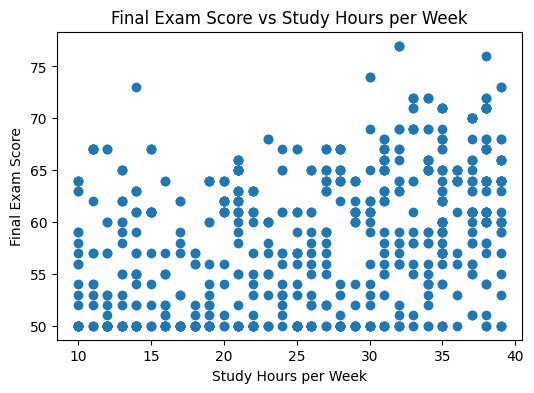

In [ ]:
make_graph("Study_Hours_per_Week", "Final_Exam_Score")

Aquí que relaciona *Attendance Rate* con *Final Exam Score*, se aprecian resultados negativos en mayor frecuencia para estudiantes con tasa de asistencia baja. Además, estudiantes con mayores porcentajes de asistencia suelen obtener mejores resultados, aunque nuevamente la variabilidad sugiere que la asistencia por sí sola no determina completamente el desempeño.  

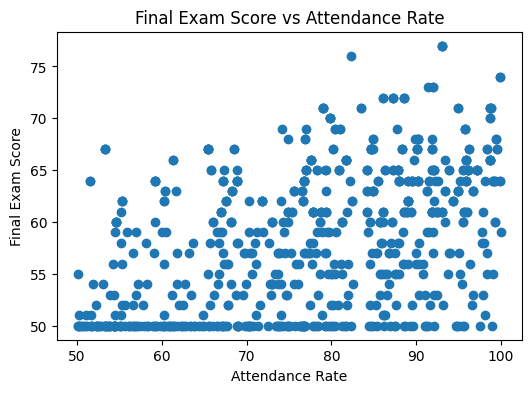

In [ ]:
make_graph("Attendance_Rate", "Final_Exam_Score")

En está tercera gráfica, que compara *Past Exam Scores* con *Final Exam Score*, se observa que los estudiantes con calificaciones bajas en examenes pasados no suelen llegar a las calificaciones más altas en el examen final.  

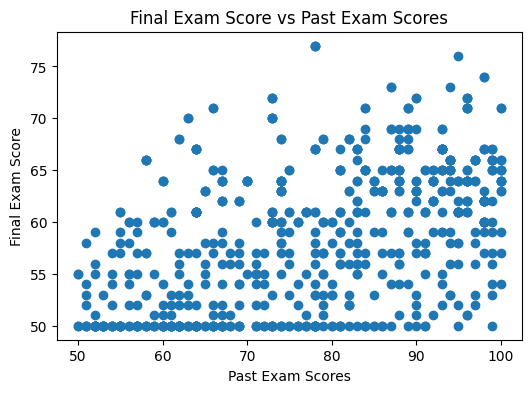

In [ ]:
make_graph("Past_Exam_Scores", "Final_Exam_Score")

## Análisis de variables categóricas mediante diagramas de caja  

Se generaron diagramas de caja para observar la distribución de las variables numéricas en función de distintas variables categóricas incluidas en el dataset.  

En conjunto, los diagramas de caja sugieren que las variables categóricas consideradas presentan cierto grado de relación con el rendimiento académico, aunque ninguna de ellas por sí sola muestra un efecto determinante sobre el puntaje final del examen.


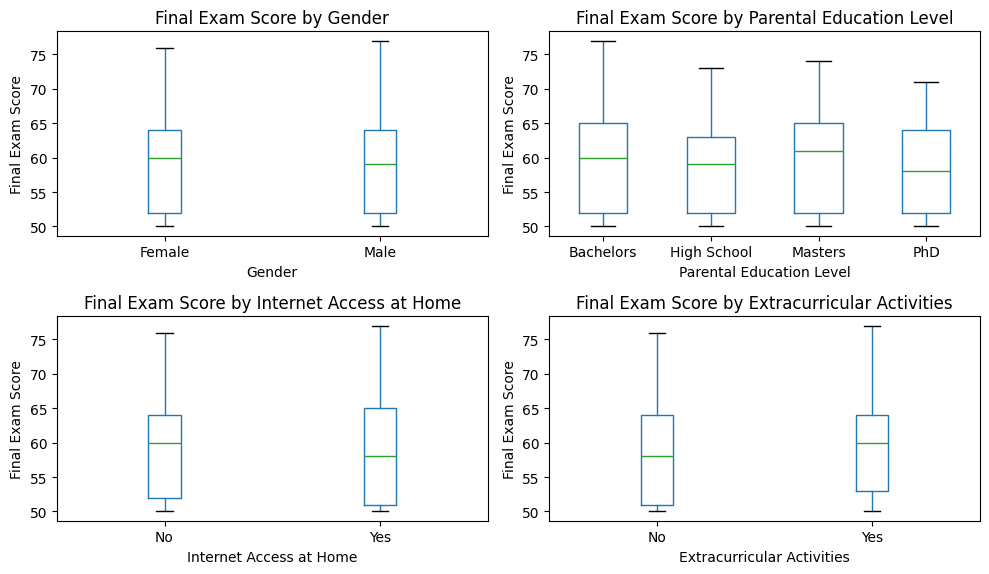

In [ ]:
make_boxplots(
    original_df,
    x="Final_Exam_Score",
    y_list=[
        "Gender",
        "Parental_Education_Level",
        "Internet_Access_at_Home",
        "Extracurricular_Activities"
    ]
)


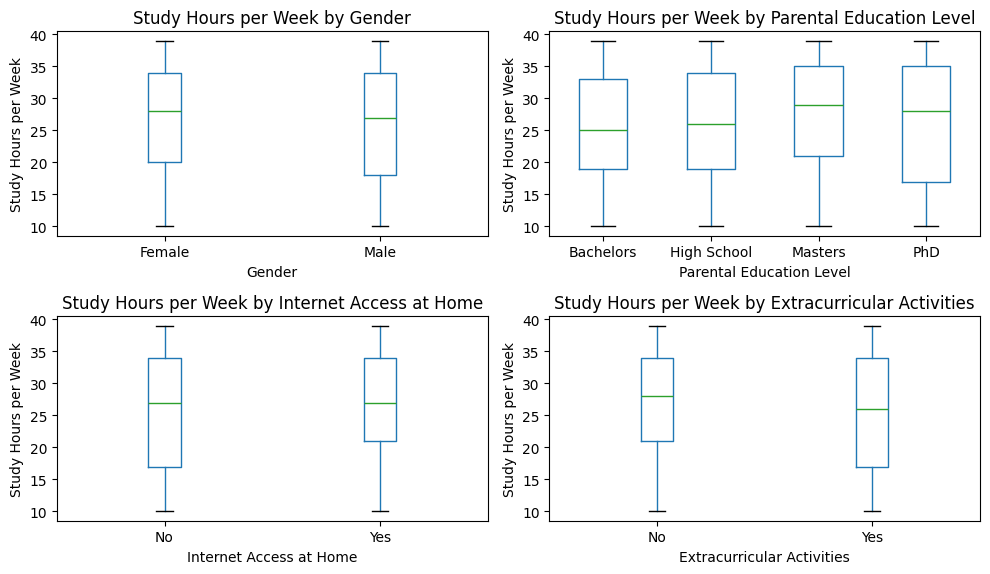

In [ ]:
make_boxplots(
    original_df,
    x="Study_Hours_per_Week",
    y_list=[
        "Gender",
        "Parental_Education_Level",
        "Internet_Access_at_Home",
        "Extracurricular_Activities"
    ]
)

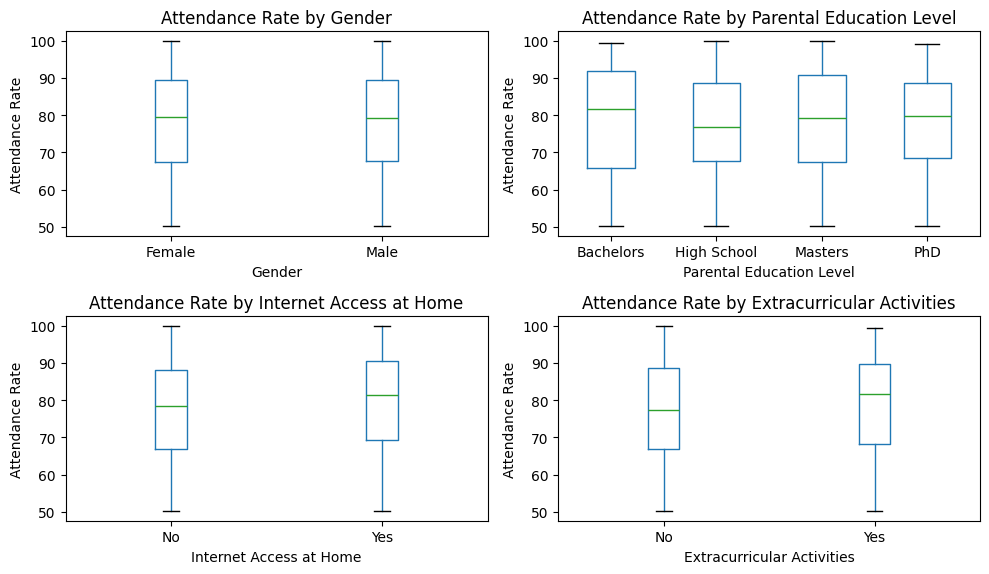

In [ ]:
make_boxplots(
    original_df,
    x="Attendance_Rate",
    y_list=[
        "Gender",
        "Parental_Education_Level",
        "Internet_Access_at_Home",
        "Extracurricular_Activities"
    ]
)

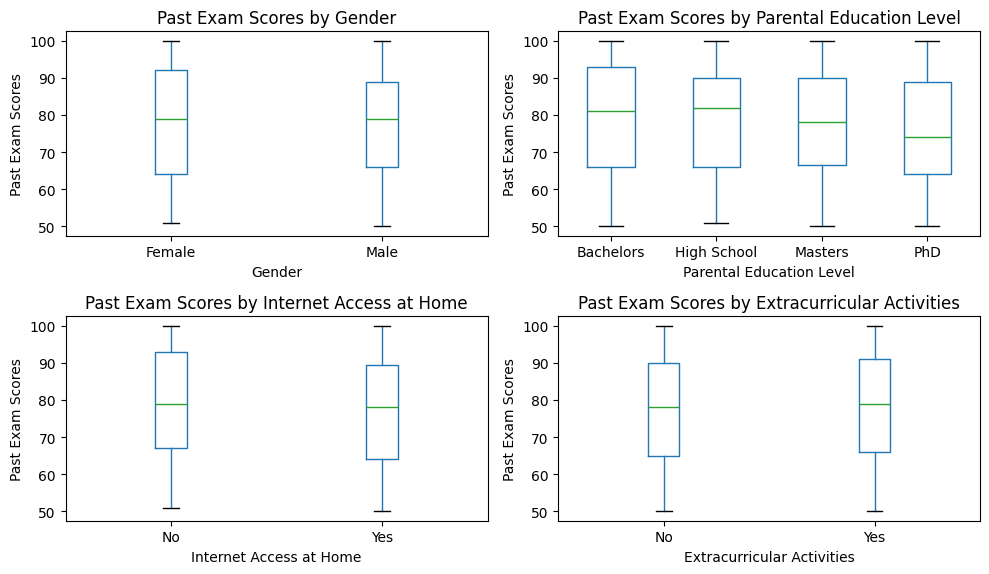

In [ ]:
make_boxplots(
    original_df,
    x="Past_Exam_Scores",
    y_list=[
        "Gender",
        "Parental_Education_Level",
        "Internet_Access_at_Home",
        "Extracurricular_Activities"
    ]
)

## Conclusión del análisis exploratorio  

Tras la revisión de las gráficas, se observa que los datos presentan patrones lógicos: más horas de estudio, mayor asistencia y mejores notas previas suelen relacionarse con un mejor desempeño en el examen final. Asimismo, el análisis de variables categóricas mediante diagramas de caja muestra que factores como el género, el nivel educativo de los padres, el acceso a internet en el hogar y la participación en actividades extracurriculares pueden introducir ligeras diferencias en la distribución de las calificaciones finales, aunque en ningún caso se aprecian efectos claramente determinantes.  

No obstante, la dispersión de los puntos en las variables numéricas y las distribuciones relativamente homogéneas en las categóricas, junto con los rangos tan delimitados de los datos, sugieren que este dataset no corresponde a observaciones reales, sino que fue generado de manera sintética con fines educativos.  

Por lo tanto, este conjunto de datos debe considerarse únicamente como un recurso para la práctica de modelos de aprendizaje automático y no como una representación fiel del rendimiento académico real de los estudiantes.


## Definición de variables independientes y dependiente  

En esta etapa se separaron las variables del dataset en dos grupos.  

Las variables independientes (X) corresponden a las características numéricas que se consideran más relevantes para explicar el rendimiento académico del estudiante. Para este modelo se descartaron las variables categóricas, puesto que no suponen un peso real dentro del modelo, quedando únicamente las columnas *Study_Hours_per_Week*, *Attendance_Rate* y *Past_Exam_Scores*.  

La variable dependiente (y) corresponde a la nota final obtenida por el estudiante en el examen, representada por la columna *Final_Exam_Score*.  

De esta manera, las variables independientes servirán como predictores en el entrenamiento del modelo de regresión lineal, mientras que la variable dependiente constituye el objetivo a predecir.


In [ ]:
# Lista de columnas a eliminar
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df["Final_Exam_Score"]

X.head() # Dataframe con las variables independientes

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores
0,31,68.267841,86
1,16,78.222927,73
2,21,87.525096,74
3,27,92.076483,99
4,37,98.655517,63


In [ ]:
y.head() # Dataframe con la variable dependiente

,Final_Exam_Score
0,63
1,50
2,55
3,65
4,70


## División de los datos en entrenamiento y prueba  

Para evaluar de manera objetiva el rendimiento del modelo, el dataset se dividió en dos subconjuntos: uno destinado al entrenamiento y otro reservado para la prueba. El conjunto de entrenamiento permite ajustar los parámetros de la regresión lineal, mientras que el conjunto de prueba se utiliza para medir la capacidad de generalización del modelo frente a datos no vistos.  

La proporción de la división fue del 80% para entrenamiento y 20% para prueba, definida mediante el parámetro.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Creación y entrenamiento del modelo de regresión lineal  

En este paso se construyó una instancia del modelo *LinearRegression* de la librería scikit-learn. Posteriormente, el modelo fue entrenado utilizando las variables de entrenamiento declaradas anteriormente.  

Durante el entrenamiento, el algoritmo de regresión lineal ajusta los coeficientes de cada variable predictora con el fin de minimizar el error cuadrático entre los valores reales y los valores estimados por el modelo. El resultado de este proceso es un modelo capaz de predecir el puntaje final de un estudiante a partir de las características definidas en el dataset.


In [ ]:
regresor = LinearRegression()
regresor = regresor.fit(X_train, y_train)

## Evaluación del modelo  

Una vez entrenado el modelo, se procedió a evaluar su rendimiento utilizando el conjunto de prueba. Para ello se generaron predicciones a partir de las variables independientes de *X_test* y se compararon con los valores reales de *y_test*.  

Las métricas seleccionadas para esta evaluación fueron:  

- **Error Cuadrático Medio (MSE):** Mide la magnitud promedio del error al elevar al cuadrado la diferencia entre las predicciones y los valores reales. Valores cercanos a cero indican un mejor ajuste.  
- **Coeficiente de determinación (R²):** Indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. Su valor oscila entre 0 y 1, donde valores más altos reflejan un mayor índice explicativo.  


In [ ]:
y_pred = regresor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 14.382452805780572
R²: 0.6619471341745269


# Análisis de los coeficientes de la regresión lineal múltiple

En el modelo de regresión lineal múltiple, cada variable independiente está asociada a un coeficiente que refleja su aporte relativo en la predicción de la variable dependiente (Final Exam Score). Estos coeficientes representan el cambio esperado en la calificación final cuando la variable correspondiente aumenta en una unidad, manteniendo constantes las demás variables del modelo.

De esta forma, un coeficiente positivo indica una relación directa, es decir, a medida que aumenta el valor de la variable independiente, también tiende a incrementarse la calificación final. Por el contrario, un coeficiente negativo señala una relación inversa, donde un aumento en la variable se asocia con una disminución en el puntaje del examen.


Este arreglo devuelve los coeficientes de regresión asociados a cada una de las variables independientes incluidas en el modelo. En un contexto de regresión lineal múltiple, cada coeficiente representa la magnitud y el sentido de la relación entre la variable independiente correspondiente y la variable dependiente, manteniendo constantes las demás variables del modelo

In [ ]:
print(regresor.coef_) # Coeficientes de regresión para cada una de las variables independientes

[0.27041319 0.22442624 0.23528226]


Este valor corresponde al punto en el que la recta de regresión corta el eje de la variable dependiente cuando todas las variables independientes toman el valor de cero.

En otras palabras, el intercepto representa la predicción base del modelo en ausencia de efectos de las variables explicativas.

In [ ]:
print(regresor.intercept_)

15.921413733854884


# Resultados del modelo  

El modelo de regresión lineal múltiple obtuvo un Error Cuadrático Medio (MSE) de 14.38 y un coeficiente de determinación (R²) de 0.66 sobre el conjunto de prueba. Estos resultados indican que el modelo logra explicar aproximadamente el 67% de la variabilidad presente en las calificaciones finales de los estudiantes.

Si bien el desempeño alcanzado sigue siendo razonable para un conjunto de datos sintético, el valor de R² evidencia que una proporción considerable de la variabilidad no es explicada por el modelo. Esto sugiere la influencia de otros factores no contemplados en las variables seleccionadas, lo que limita la capacidad predictiva de la regresión lineal en esta configuración.  


# Pruebas extra del modelo incluyendo distintas variables independientes

Con el objetivo de evaluar la influencia de distintas variables independientes en el desempeño del modelo, se realizaron múltiples entrenamientos de la regresión lineal múltiple incorporando diferentes combinaciones de predictores. Esta etapa buscó identificar si la inclusión de características adicionales mejoraba la capacidad explicativa del modelo sobre las calificaciones finales de los estudiantes, así como analizar la relevancia potencial de dichas variables en la predicción.

## Función para evaluar el modelo

Con el fin de agilizar el proceso de evaluación y evitar la repetición manual de pasos en cada entrenamiento, se definió la siguiente función `evaluate_model`. Esta función automatiza la división del conjunto de datos en entrenamiento y prueba, entrena el modelo de regresión lineal y calcula las métricas de desempeño correspondientes (Error Cuadrático Medio y coeficiente de determinación R²):

In [ ]:
def evaluate_model(X, y):
  # Dividir los datos en entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
  )

  # Crear el regresor y entrenar el modelo
  regresor = LinearRegression()
  regresor.fit(X_train, y_train)

  # Evaluar el modelo
  y_pred = regresor.predict(X_test)
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("R²: ", r2_score(y_test, y_pred))

## Agregando la variable de "Género"

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    #"Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.369692809205745
R²:  0.6622470519610333


## Agregando la variable de "Acceso a internet en casa"

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    #"Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.510693412588129
R²:  0.6589328983392408


## Agregando la variable de "Nivel educativo de los padres"

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    #"Parental_Education_Level_High School",
    #"Parental_Education_Level_Masters",
    #"Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.868409709539288
R²:  0.6505249431058879


## Agregando la variables de "Actividades Extracurriculares"

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    #"Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.22197185893993
R²:  0.6657191642115772


## Probando con dos variables de clasificación

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    #"Gender_Male",
    #"Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.50884438859988
R²:  0.6589763587883484


## Agregando todas las variables de clasificación

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    #"Gender_Male",
    #"Internet_Access_at_Home_Yes",
    #"Parental_Education_Level_High School",
    #"Parental_Education_Level_Masters",
    #"Parental_Education_Level_PhD",
    #"Extracurricular_Activities_Yes"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  14.792138932473858
R²:  0.6523176522573715


## Eliminando una de las variables numéricas

In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes",
    "Attendance_Rate"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  23.776635442212935
R²:  0.4411412392956314


In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes",
    "Past_Exam_Scores"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  22.816001860031403
R²:  0.4637204849813281


In [ ]:
drop_columns = [
    "Final_Exam_Score", # Variable dependiente
    "Gender_Male",
    "Internet_Access_at_Home_Yes",
    "Parental_Education_Level_High School",
    "Parental_Education_Level_Masters",
    "Parental_Education_Level_PhD",
    "Extracurricular_Activities_Yes",
    "Study_Hours_per_Week"
]

X = df.drop(drop_columns, axis=1)
y = df['Final_Exam_Score']

evaluate_model(X, y)

MSE:  24.12546292993579
R²:  0.4329422113901815


# Resultados de las pruebas

En general, los entrenamientos realizados con la inclusión de variables categóricas produjeron resultados muy similares a los obtenidos al evaluar el modelo únicamente con variables numéricas. Se observaron pequeñas variaciones en los valores de MSE y R², pero sin representar mejoras sustanciales en el desempeño global del modelo. Esto sugiere que, en este caso, las variables de clasificación no aportaron un valor predictivo significativo para explicar las calificaciones finales de los estudiantes, al contrario de las variables numéricas que al eliminar alguna de ellas, hacen que el desempeño del modelo empeore considerablemente.